In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


import warnings
warnings.filterwarnings("ignore")

/home/anson/.local/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Loading Data

In [2]:
file = uproot.open("./features/JpsiTauNu_FWM.root")
# df_tau = file['t'].pandas.df()
df_tau = pd.DataFrame(np.array(file['t']['FWMs'].array()))

file = uproot.open("./features/JpsiMuNu_FWM.root")
df_mu = pd.DataFrame(np.array(file['t']['FWMs'].array()))

file = uproot.open("./features/RJpsiMisID_FWM.root")
df_misid = pd.DataFrame(np.array(file['t']['FWMs'].array()))

file = uproot.open("./features/RJpsiInclusive_FWM.root")
df_incl1 = pd.DataFrame(np.array(file['t']['FWMs'].array()))
file = uproot.open("./features/RJpsiInclusive_FWM_seed2.root")
df_incl2 = pd.DataFrame(np.array(file['t']['FWMs'].array()))
df_incl = pd.concat([df_incl1, df_incl2])

file = uproot.open("./features/RJpsiCombCascade_FWM.root")
df_comb = pd.DataFrame(np.array(file['t']['FWMs'].array()))

In [13]:

pwr = 1
file = uproot.open("./features/JpsiTauNu_FWM_FlavorOnly.root")
# df_tau = file['t'].pandas.df()
df_tau_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))

file = uproot.open("./features/JpsiMuNu_FWM_FlavorOnly.root")
df_mu_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))

file = uproot.open("./features/RJpsiMisID_FWM_FlavorOnly.root")
df_misid_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))

file = uproot.open("./features/RJpsiInclusive_FWM_FlavorOnly.root")
df_incl1_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))
file = uproot.open("./features/RJpsiInclusive_FWM_FlavorOnly_seed2.root")
df_incl2_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))
df_incl_FlavorOnly = pd.concat([df_incl1_FlavorOnly, df_incl2_FlavorOnly])

file = uproot.open("./features/RJpsiCombCascade_FWM_FlavorOnly.root")
df_comb_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))

In [22]:
pwr_ = 0.5
pwr = ''.join(str(pwr_).split('.'))

file = uproot.open(f"./features/JpsiTauNu_FWM_FlavorOnly_pwr{pwr}.root")
# df_tau = file['t'].pandas.df()
df_tau_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))

file = uproot.open(f"./features/JpsiMuNu_FWM_FlavorOnly_pwr{pwr}.root")
df_mu_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))

file = uproot.open(f"./features/RJpsiMisID_FWM_FlavorOnly_pwr{pwr}.root")
df_misid_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))

file = uproot.open(f"./features/RJpsiInclusive_FWM_FlavorOnly_pwr{pwr}.root")
df_incl1_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))
file = uproot.open(f"./features/RJpsiInclusive_FWM_FlavorOnly_pwr{pwr}_seed2.root")
df_incl2_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))
df_incl_FlavorOnly = pd.concat([df_incl1_FlavorOnly, df_incl2_FlavorOnly])

file = uproot.open(f"./features/RJpsiCombCascade_FWM_FlavorOnly_pwr{pwr}.root")
df_comb_FlavorOnly = pd.DataFrame(np.array(file['t']['FWMs'].array()))

pwr = pwr_

In [19]:
df_comb['angle_sum'] = df_comb['angle1'] + df_comb['angle2']
df_comb['E_sum'] = df_comb['E1'] + df_comb['E2']


four_B = df_comb.nB == 4
two_B_two_c = (df_comb.nB == 2) & (df_comb.nC == 2)
# two_B = (df_comb.nB == 2) & (df_comb.nC == 0) 
two_B = (~ four_B) & (~ two_B_two_c)

df_4b = df_comb.loc[four_B]
df_2b2c = df_comb.loc[two_B_two_c]
df_2b = df_comb.loc[two_B]


NameError: name 'df_comb' is not defined

In [23]:

df_comb_FlavorOnly['angle_sum'] = df_comb_FlavorOnly['angle1'] + df_comb_FlavorOnly['angle2']
df_comb_FlavorOnly['E_sum'] = df_comb_FlavorOnly['E1'] + df_comb_FlavorOnly['E2']


four_B = df_comb_FlavorOnly.nB == 4
two_B_two_c = (df_comb_FlavorOnly.nB == 2) & (df_comb_FlavorOnly.nC == 2)
# two_B = (df_comb_FlavorOnly.nB == 2) & (df_comb_FlavorOnly.nC == 0) 
two_B = (~ four_B) & (~ two_B_two_c)

df_4b_FlavorOnly = df_comb_FlavorOnly.loc[four_B]
df_2b2c_FlavorOnly = df_comb_FlavorOnly.loc[two_B_two_c]
df_2b_FlavorOnly = df_comb_FlavorOnly.loc[two_B]


### Plotting 

[]

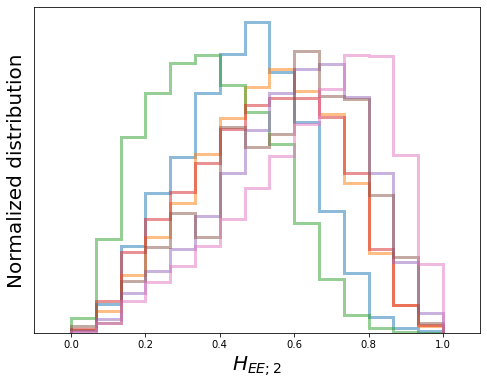

In [7]:

f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)

bins_=15
range_=[0,1]
ax1.margins(x=0.1)

# bins_=30
# range_=[-0.5,1.]

df_tau_ = df_tau[(df_tau.H_EE2<=1)&(df_tau.H_EE2>=0)]
ax1.hist(df_tau_['H_EE2'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

df_mu_ = df_mu[(df_mu.H_EE2<=1)&(df_mu.H_EE2>=0)]
ax1.hist(df_mu_['H_EE2'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');


df_4b_ = df_4b[(df_4b.H_EE2<=1)&(df_4b.H_EE2>=0)]
plt.hist(df_4b_['H_EE2'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

df_2b2c_ = df_2b2c[(df_2b2c.H_EE2<=1)&(df_2b2c.H_EE2>=0)]
plt.hist(df_2b2c_['H_EE2'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

df_2b_ = df_2b[(df_2b.H_EE2<=1)&(df_2b.H_EE2>=0)]
plt.hist(df_2b_['H_EE2'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');


df_incl_ = df_incl[(df_incl.H_EE2<=1)&(df_incl.H_EE2>=0)]
plt.hist(df_incl_['H_EE2'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

df_misid_ = df_misid[(df_misid.H_EE2<=1)&(df_misid.H_EE2>=0)]
plt.hist(df_misid_['H_EE2'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');



ax1.set_ylabel('Normalized distribution', fontsize=20)
ax1.set_xlabel(r'$H_{EE;2}$', fontsize=20)
ax1.set_yticks([])
# ax1.legend(loc=2, fontsize=20)

# f.savefig('./figures/FWM_EE2')


In [8]:
HEE_col = ['H_EE0', 'H_EE1', 'H_EE2', 'H_EE3', 'H_EE4', 
           'H_EE5', 'H_EE6', 'H_EE7', 'H_EE8', 'H_EE9', 'H_EE10']

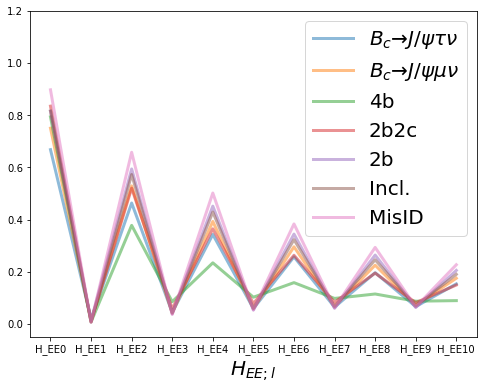

In [9]:

f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)



df_tau[HEE_col].mean(axis=0).plot(lw=3, alpha=0.5, ax=ax1, label=r'$B_c\to J/\psi \tau \nu$', color='C0')
df_mu[HEE_col].mean(axis=0).plot(lw=3, alpha=0.5, ax=ax1, label=r'$B_c\to J/\psi \mu \nu$', color='C1')
df_4b[HEE_col].mean(axis=0).plot(lw=3, alpha=0.5, ax=ax1, label='4b', color='C2')
df_2b2c[HEE_col].mean(axis=0).plot(lw=3, alpha=0.5, ax=ax1, label='2b2c', color='C3')
df_2b[HEE_col].mean(axis=0).plot(lw=3, alpha=0.5, ax=ax1, label='2b', color='C4')
df_incl[HEE_col].mean(axis=0).plot(lw=3, alpha=0.5, ax=ax1, label='Incl.', color='C5')
df_misid[HEE_col].mean(axis=0).plot(lw=3, alpha=0.5, ax=ax1, label='MisID', color='C6')


ax1.set_ylim([-0.05, 1.2])
# ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$H_{EE;l}$', fontsize=20)
# ax1.set_yticks([])
ax1.legend(loc=1, fontsize=20)
ax1.set_xticks(np.arange(len(HEE_col)), HEE_col);

f.savefig('./figures/FWM_EEl')



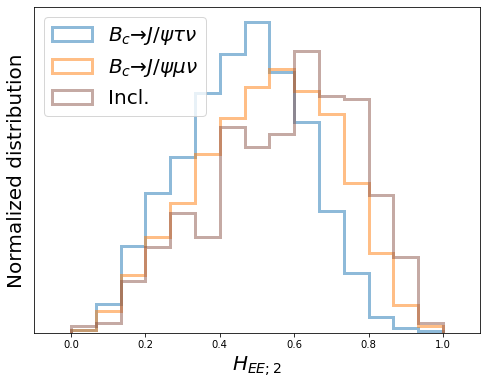

In [10]:

f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)

bins_=15
range_=[0,1]
ax1.margins(x=0.1)

df_tau_ = df_tau[(df_tau.H_EE2<=1)&(df_tau.H_EE2>=0)]
ax1.hist(df_tau_['H_EE2'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

df_mu_ = df_mu[(df_mu.H_EE2<=1)&(df_mu.H_EE2>=0)]
ax1.hist(df_mu_['H_EE2'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');


# df_4b_ = df_4b[(df_4b.H_EE2<=1)&(df_4b.H_EE2>=0)]
# plt.hist(df_4b_['H_EE2'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

# df_2b2c_ = df_2b2c[(df_2b2c.H_EE2<=1)&(df_2b2c.H_EE2>=0)]
# plt.hist(df_2b2c_['H_EE2'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

# df_2b_ = df_2b[(df_2b.H_EE2<=1)&(df_2b.H_EE2>=0)]
# plt.hist(df_2b_['H_EE2'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');


df_incl_ = df_incl[(df_incl.H_EE2<=1)&(df_incl.H_EE2>=0)]
plt.hist(df_incl_['H_EE2'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

# df_misid_ = df_misid[(df_misid.H_EE2<=1)&(df_misid.H_EE2>=0)]
# plt.hist(df_misid_['H_EE2'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');



ax1.set_ylabel('Normalized distribution', fontsize=20)
ax1.set_xlabel(r'$H_{EE;2}$', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=2, fontsize=20)

# f.savefig('./figures/FWM_EE2_Bc_incl')


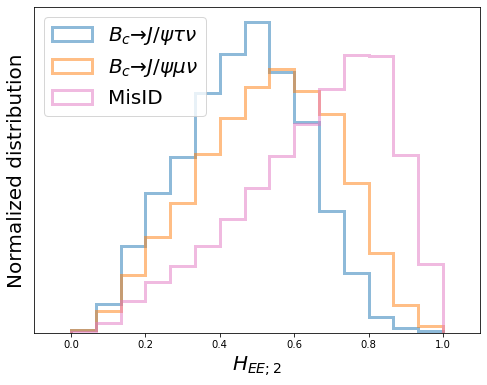

In [11]:

f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)


bins_=15
range_=[0,1]
ax1.margins(x=0.1)

df_tau_ = df_tau[(df_tau.H_EE2<=1)&(df_tau.H_EE2>=0)]
ax1.hist(df_tau_['H_EE2'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

df_mu_ = df_mu[(df_mu.H_EE2<=1)&(df_mu.H_EE2>=0)]
ax1.hist(df_mu_['H_EE2'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');


# df_4b_ = df_4b[(df_4b.H_EE2<=1)&(df_4b.H_EE2>=0)]
# plt.hist(df_4b_['H_EE2'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

# df_2b2c_ = df_2b2c[(df_2b2c.H_EE2<=1)&(df_2b2c.H_EE2>=0)]
# plt.hist(df_2b2c_['H_EE2'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

# df_2b_ = df_2b[(df_2b.H_EE2<=1)&(df_2b.H_EE2>=0)]
# plt.hist(df_2b_['H_EE2'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');


# df_incl_ = df_incl[(df_incl.H_EE2<=1)&(df_incl.H_EE2>=0)]
# plt.hist(df_incl_['H_EE2'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

df_misid_ = df_misid[(df_misid.H_EE2<=1)&(df_misid.H_EE2>=0)]
plt.hist(df_misid_['H_EE2'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');



ax1.set_ylabel('Normalized distribution', fontsize=20)
ax1.set_xlabel(r'$H_{EE;2}$', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=2, fontsize=20)


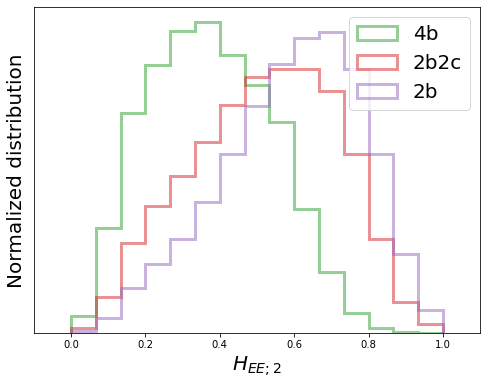

In [69]:

f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)


bins_=15
range_=[0,1]
ax1.margins(x=0.1)

# df_tau_ = df_tau[(df_tau.H_EE2<=1)&(df_tau.H_EE2>=0)]
# ax1.hist(df_tau_['H_EE2'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

# df_mu_ = df_mu[(df_mu.H_EE2<=1)&(df_mu.H_EE2>=0)]
# ax1.hist(df_mu_['H_EE2'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');


df_4b_ = df_4b[(df_4b.H_EE2<=1)&(df_4b.H_EE2>=0)]
plt.hist(df_4b_['H_EE2'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

df_2b2c_ = df_2b2c[(df_2b2c.H_EE2<=1)&(df_2b2c.H_EE2>=0)]
plt.hist(df_2b2c_['H_EE2'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

df_2b_ = df_2b[(df_2b.H_EE2<=1)&(df_2b.H_EE2>=0)]
plt.hist(df_2b_['H_EE2'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');


# df_incl_ = df_incl[(df_incl.H_EE2<=1)&(df_incl.H_EE2>=0)]
# plt.hist(df_incl_['H_EE2'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

# df_misid_ = df_misid[(df_misid.H_EE2<=1)&(df_misid.H_EE2>=0)]
# plt.hist(df_misid_['H_EE2'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');



ax1.set_ylabel('Normalized distribution', fontsize=20)
ax1.set_xlabel(r'$H_{EE;2}$', fontsize=20)
ax1.set_yticks([])
ax1.legend(loc=1, fontsize=20)

# f.savefig('./figures/FWM_EE2_bs')


[]

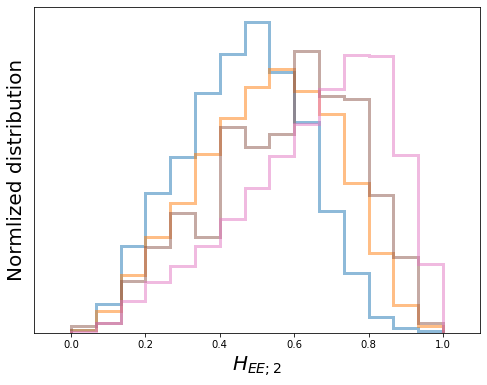

In [70]:

f = plt.figure(figsize=(8,6))
ax1 = plt.subplot(111)


bins_=15
range_=[0,1]
ax1.margins(x=0.1)

df_tau_ = df_tau[(df_tau.H_EE2<=1)&(df_tau.H_EE2>=0)]
ax1.hist(df_tau_['H_EE2'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

df_mu_ = df_mu[(df_mu.H_EE2<=1)&(df_mu.H_EE2>=0)]
ax1.hist(df_mu_['H_EE2'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');


# df_4b_ = df_4b[(df_4b.H_EE2<=1)&(df_4b.H_EE2>=0)]
# plt.hist(df_4b_['H_EE2'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

# df_2b2c_ = df_2b2c[(df_2b2c.H_EE2<=1)&(df_2b2c.H_EE2>=0)]
# plt.hist(df_2b2c_['H_EE2'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

# df_2b_ = df_2b[(df_2b.H_EE2<=1)&(df_2b.H_EE2>=0)]
# plt.hist(df_2b_['H_EE2'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');


df_incl_ = df_incl[(df_incl.H_EE2<=1)&(df_incl.H_EE2>=0)]
plt.hist(df_incl_['H_EE2'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

df_misid_ = df_misid[(df_misid.H_EE2<=1)&(df_misid.H_EE2>=0)]
plt.hist(df_misid_['H_EE2'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');



ax1.set_ylabel('Normlized distribution', fontsize=20)
ax1.set_xlabel(r'$H_{EE;2}$', fontsize=20)
ax1.set_yticks([])
# ax1.legend(loc=2, fontsize=20)

# f.savefig('./figures/FWM_EE2')


### plotting flavour only

In [84]:

# f = plt.figure(figsize=(8,6))
# ax1 = plt.subplot(111)

# bins_=15
# range_=[0,0.1]
# ax1.margins(x=0.1)

# # bins_=30
# # range_=[-0.5,1.]

# df_tau_ = df_tau_FlavorOnly[(df_tau_FlavorOnly.H_EE2<=1)&(df_tau_FlavorOnly.H_EE2>=0)]
# ax1.hist(df_tau_['H_EE2'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
# ax1.hist(df_mu_['H_EE2'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_4b_ = df_4b_FlavorOnly[(df_4b_FlavorOnly.H_EE2<=1)&(df_4b_FlavorOnly.H_EE2>=0)]
# plt.hist(df_4b_['H_EE2'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

# df_2b2c_ = df_2b2c_FlavorOnly[(df_2b2c_FlavorOnly.H_EE2<=1)&(df_2b2c_FlavorOnly.H_EE2>=0)]
# plt.hist(df_2b2c_['H_EE2'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

# df_2b_ = df_2b_FlavorOnly[(df_2b_FlavorOnly.H_EE2<=1)&(df_2b_FlavorOnly.H_EE2>=0)]
# plt.hist(df_2b_['H_EE2'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');

# df_incl_ = df_incl_FlavorOnly[(df_incl_FlavorOnly.H_EE2<=1)&(df_incl_FlavorOnly.H_EE2>=0)]
# plt.hist(df_incl_['H_EE2'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

# df_misid_ = df_misid_FlavorOnly[(df_misid_FlavorOnly.H_EE2<=1)&(df_misid_FlavorOnly.H_EE2>=0)]
# plt.hist(df_misid_['H_EE2'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');



# ax1.set_ylabel('Normalized distribution', fontsize=20)
# ax1.set_xlabel(r'$H_{EE;2}$', fontsize=20)
# ax1.set_yticks([])
# # ax1.legend(loc=2, fontsize=20)

# # f.savefig('./figures/FWM_EE2')


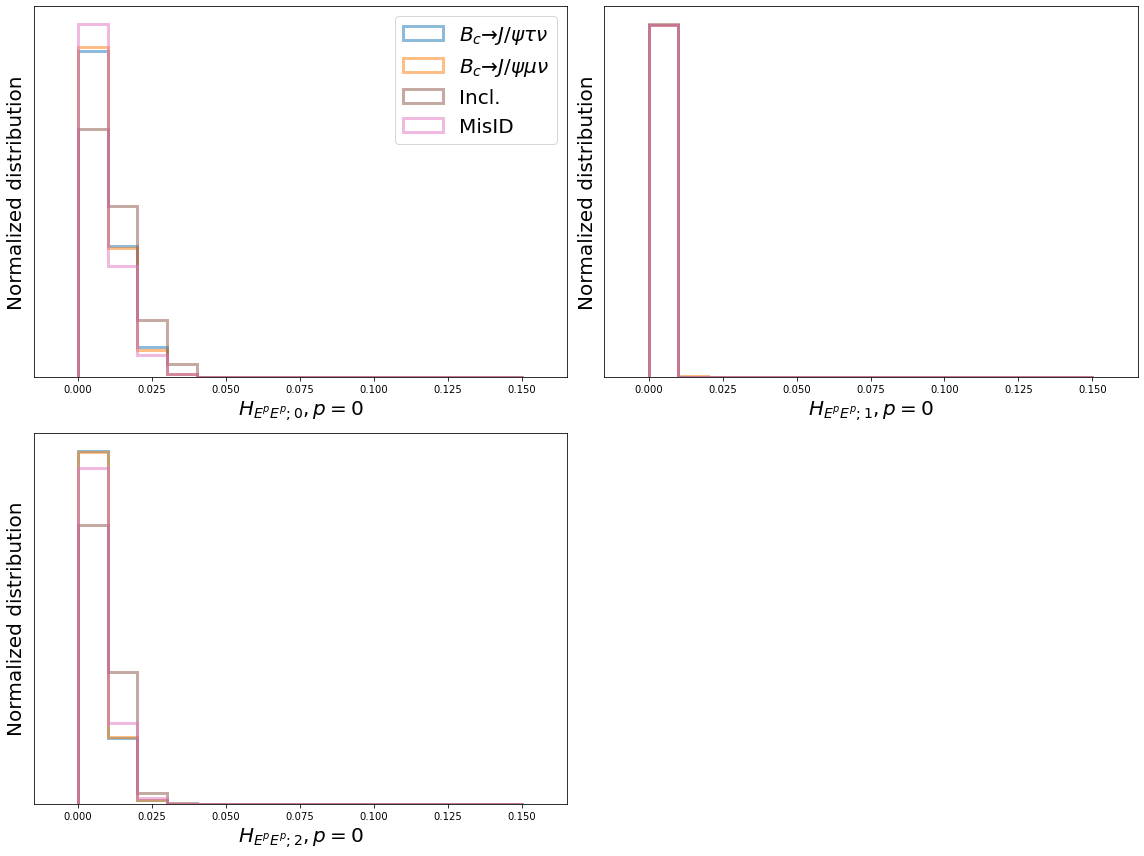

In [4]:

# f = plt.figure(figsize=(8,6))
f = plt.figure(figsize=(16,12))

bins_=15
range_=[0,df_tau_FlavorOnly['H_EE0'].max()*2]

ax1 = plt.subplot(221)
ax1.margins(x=0.1)

# df_tau_ = df_tau_FlavorOnly[(df_tau_FlavorOnly.H_EE0<=1)&(df_tau_FlavorOnly.H_EE0>=0)]
df_tau_ = df_tau_FlavorOnly
ax1.hist(df_tau_['H_EE0'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE0<=1)&(df_mu_FlavorOnly.H_EE0>=0)]
df_mu_ = df_mu_FlavorOnly
ax1.hist(df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_incl_ = df_incl_FlavorOnly[(df_incl_FlavorOnly.H_EE0<=1)&(df_incl_FlavorOnly.H_EE0>=0)]
df_incl_ = df_incl_FlavorOnly
ax1.hist(df_incl_['H_EE0'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

# df_misid_ = df_misid_FlavorOnly[(df_misid_FlavorOnly.H_EE0<=1)&(df_misid_FlavorOnly.H_EE0>=0)]
df_misid_ = df_misid_FlavorOnly
ax1.hist(df_misid_['H_EE0'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');


ax2 = plt.subplot(222)
ax2.margins(x=0.1)

# df_tau_ = df_tau_FlavorOnly[(df_tau_FlavorOnly.H_EE1<=1)&(df_tau_FlavorOnly.H_EE1>=0)]
df_tau_ = df_tau_FlavorOnly
ax2.hist(df_tau_['H_EE1'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE1<=1)&(df_mu_FlavorOnly.H_EE1>=0)]
df_mu_ = df_mu_FlavorOnly
ax2.hist(df_mu_['H_EE1'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_incl_ = df_incl_FlavorOnly[(df_incl_FlavorOnly.H_EE1<=1)&(df_incl_FlavorOnly.H_EE1>=0)]
df_incl_ = df_incl_FlavorOnly
ax2.hist(df_incl_['H_EE1'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

# df_misid_ = df_misid_FlavorOnly[(df_misid_FlavorOnly.H_EE2<=1)&(df_misid_FlavorOnly.H_EE2>=0)]
df_misid_ = df_misid_FlavorOnly
ax2.hist(df_misid_['H_EE1'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');

ax3 = plt.subplot(223)
ax3.margins(x=0.1)

# df_tau_ = df_tau_FlavorOnly[(df_tau_FlavorOnly.H_EE2<=1)&(df_tau_FlavorOnly.H_EE2>=0)]
df_tau_ = df_tau_FlavorOnly
ax3.hist(df_tau_['H_EE2'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax3.hist(df_mu_['H_EE2'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_incl_ = df_incl_FlavorOnly[(df_incl_FlavorOnly.H_EE2<=1)&(df_incl_FlavorOnly.H_EE2>=0)]
df_incl_ = df_incl_FlavorOnly
ax3.hist(df_incl_['H_EE2'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

# df_misid_ = df_misid_FlavorOnly[(df_misid_FlavorOnly.H_EE2<=1)&(df_misid_FlavorOnly.H_EE2>=0)]
df_misid_ = df_misid_FlavorOnly
ax3.hist(df_misid_['H_EE2'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');






ax1.set_ylabel('Normalized distribution', fontsize=20)
ax1.set_xlabel(r"$H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax1.set_yticks([])
ax2.set_ylabel('Normalized distribution', fontsize=20)
ax2.set_xlabel(r"$H_{E^pE^p;1}$" + f"$, p={pwr}$", fontsize=20)
ax2.set_yticks([])
ax3.set_ylabel('Normalized distribution', fontsize=20)
ax3.set_xlabel(r"$H_{E^pE^p;2}$" + f"$, p={pwr}$", fontsize=20)
ax3.set_yticks([])
ax1.legend(loc=1, fontsize=20)



# f.savefig('./figures/FWM_EE2')
plt.tight_layout()

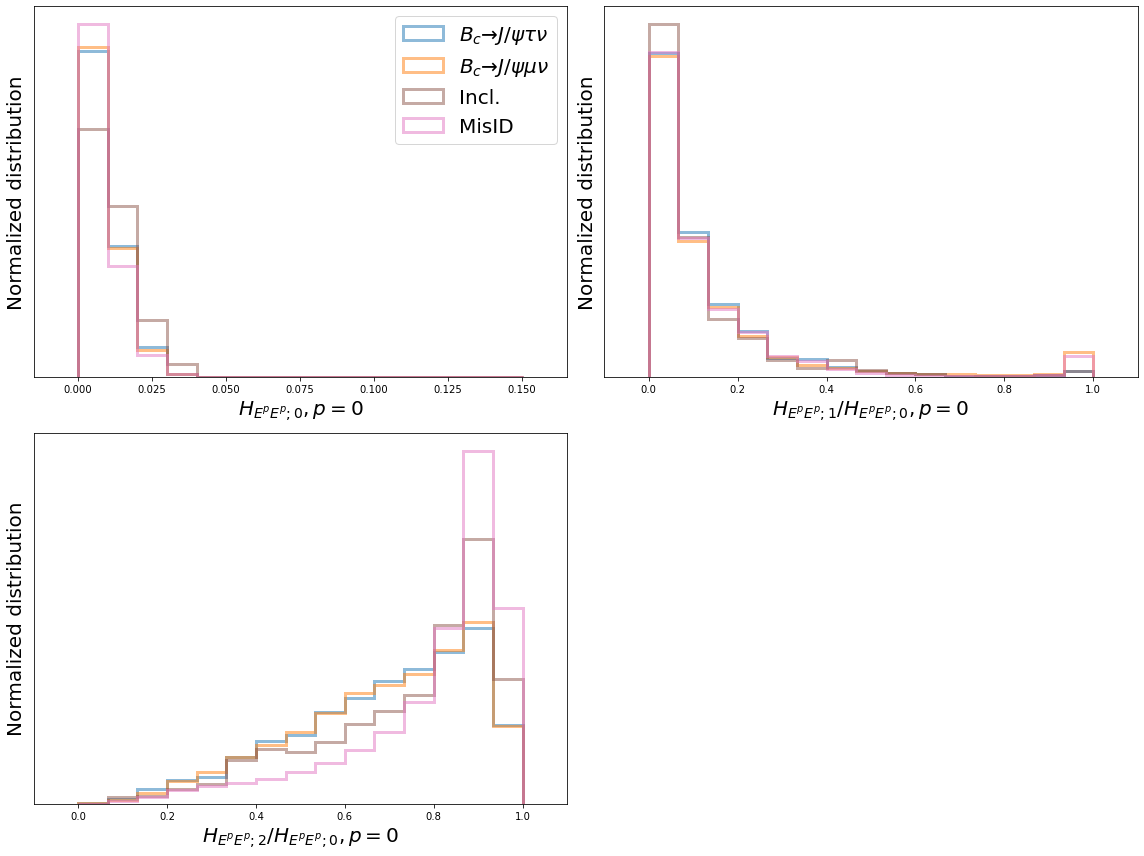

In [5]:

# f = plt.figure(figsize=(8,6))
f = plt.figure(figsize=(16,12))

bins_=15
range_=[0,df_tau_FlavorOnly['H_EE0'].max()*2]

ax1 = plt.subplot(221)
ax1.margins(x=0.1)

# df_tau_ = df_tau_FlavorOnly[(df_tau_FlavorOnly.H_EE0<=1)&(df_tau_FlavorOnly.H_EE0>=0)]
df_tau_ = df_tau_FlavorOnly
ax1.hist(df_tau_['H_EE0'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE0<=1)&(df_mu_FlavorOnly.H_EE0>=0)]
df_mu_ = df_mu_FlavorOnly
ax1.hist(df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_incl_ = df_incl_FlavorOnly[(df_incl_FlavorOnly.H_EE0<=1)&(df_incl_FlavorOnly.H_EE0>=0)]
df_incl_ = df_incl_FlavorOnly
ax1.hist(df_incl_['H_EE0'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

# df_misid_ = df_misid_FlavorOnly[(df_misid_FlavorOnly.H_EE0<=1)&(df_misid_FlavorOnly.H_EE0>=0)]
df_misid_ = df_misid_FlavorOnly
ax1.hist(df_misid_['H_EE0'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');


range_=[0,1]
ax2 = plt.subplot(222)
ax2.margins(x=0.1)

# df_tau_ = df_tau_FlavorOnly[(df_tau_FlavorOnly.H_EE1<=1)&(df_tau_FlavorOnly.H_EE1>=0)]
df_tau_ = df_tau_FlavorOnly
ax2.hist(df_tau_['H_EE1']/df_tau_['H_EE0'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE1<=1)&(df_mu_FlavorOnly.H_EE1>=0)]
df_mu_ = df_mu_FlavorOnly
ax2.hist(df_mu_['H_EE1']/df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_incl_ = df_incl_FlavorOnly[(df_incl_FlavorOnly.H_EE1<=1)&(df_incl_FlavorOnly.H_EE1>=0)]
df_incl_ = df_incl_FlavorOnly
ax2.hist(df_incl_['H_EE1']/df_incl_['H_EE0'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

# df_misid_ = df_misid_FlavorOnly[(df_misid_FlavorOnly.H_EE2<=1)&(df_misid_FlavorOnly.H_EE2>=0)]
df_misid_ = df_misid_FlavorOnly
ax2.hist(df_misid_['H_EE1']/df_misid_['H_EE0'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');

ax3 = plt.subplot(223)
ax3.margins(x=0.1)

# df_tau_ = df_tau_FlavorOnly[(df_tau_FlavorOnly.H_EE2<=1)&(df_tau_FlavorOnly.H_EE2>=0)]
df_tau_ = df_tau_FlavorOnly
ax3.hist(df_tau_['H_EE2']/df_tau_['H_EE0'], weights=[1/len(df_tau_)]*len(df_tau_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \tau \nu$', color='C0');

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax3.hist(df_mu_['H_EE2']/df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_incl_ = df_incl_FlavorOnly[(df_incl_FlavorOnly.H_EE2<=1)&(df_incl_FlavorOnly.H_EE2>=0)]
df_incl_ = df_incl_FlavorOnly
ax3.hist(df_incl_['H_EE2']/df_incl_['H_EE0'], weights=[1/len(df_incl_)]*len(df_incl_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='Incl.', color='C5');

# df_misid_ = df_misid_FlavorOnly[(df_misid_FlavorOnly.H_EE2<=1)&(df_misid_FlavorOnly.H_EE2>=0)]
df_misid_ = df_misid_FlavorOnly
ax3.hist(df_misid_['H_EE2']/df_misid_['H_EE0'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');



ax1.set_ylabel('Normalized distribution', fontsize=20)
ax1.set_xlabel(r"$H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax1.set_yticks([])
ax2.set_ylabel('Normalized distribution', fontsize=20)
ax2.set_xlabel(r"$H_{E^pE^p;1}/H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax2.set_yticks([])
ax3.set_ylabel('Normalized distribution', fontsize=20)
ax3.set_xlabel(r"$H_{E^pE^p;2}/H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax3.set_yticks([])
ax1.legend(loc=1, fontsize=20)



# f.savefig('./figures/FWM_EE2')
plt.tight_layout()

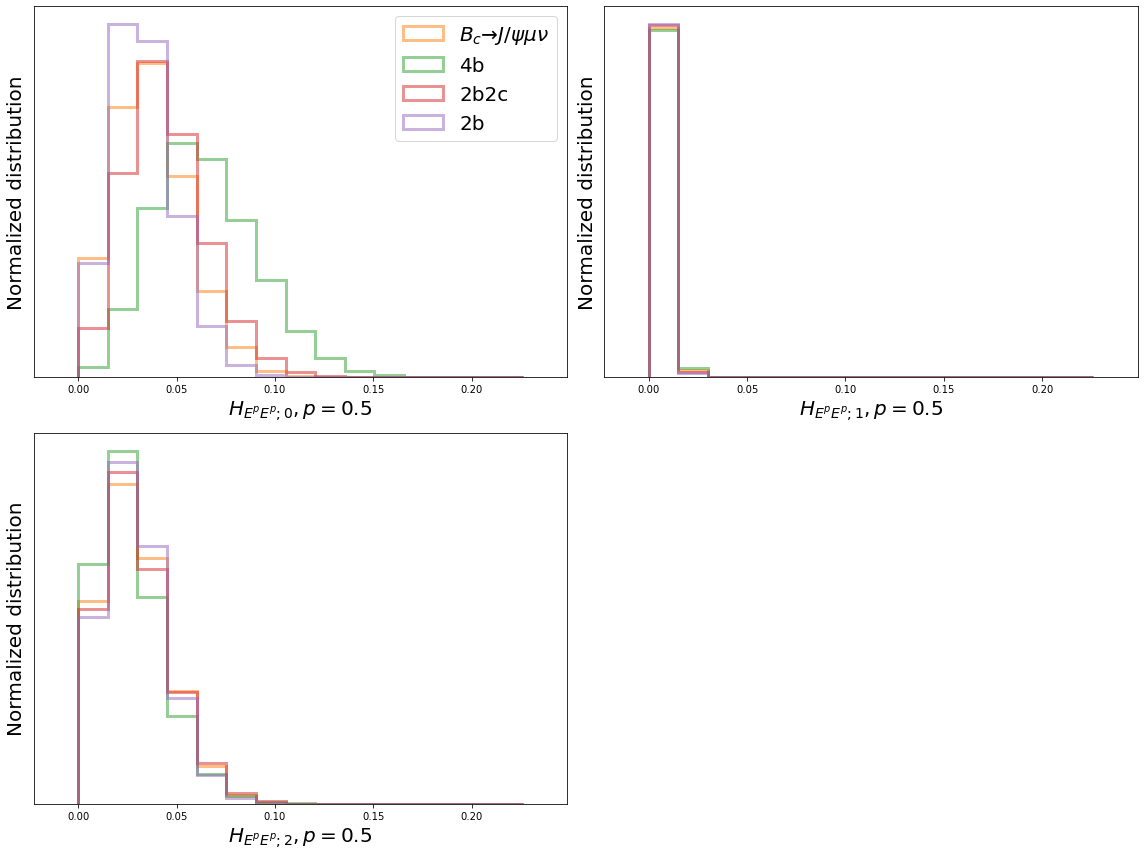

In [25]:

# f = plt.figure(figsize=(8,6))
f = plt.figure(figsize=(16,12))

bins_=15
range_=[0,df_tau_FlavorOnly['H_EE0'].max()*2]

ax1 = plt.subplot(221)
ax1.margins(x=0.1)
# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax1.hist(df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_4b_ = df_4b_FlavorOnly[(df_4b_FlavorOnly.H_EE2<=1)&(df_4b_FlavorOnly.H_EE2>=0)]
df_4b_ = df_4b_FlavorOnly
ax1.hist(df_4b_['H_EE0'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

# df_2b2c_ = df_2b2c_FlavorOnly[(df_2b2c_FlavorOnly.H_EE2<=1)&(df_2b2c_FlavorOnly.H_EE2>=0)]
df_2b2c_ = df_2b2c_FlavorOnly
ax1.hist(df_2b2c_['H_EE0'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

# df_2b_ = df_2b_FlavorOnly[(df_2b_FlavorOnly.H_EE2<=1)&(df_2b_FlavorOnly.H_EE2>=0)]
df_2b_ = df_2b_FlavorOnly
ax1.hist(df_2b_['H_EE0'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');

ax2 = plt.subplot(222)
ax2.margins(x=0.1)

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax2.hist(df_mu_['H_EE1'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_4b_ = df_4b_FlavorOnly[(df_4b_FlavorOnly.H_EE2<=1)&(df_4b_FlavorOnly.H_EE2>=0)]
df_4b_ = df_4b_FlavorOnly
ax2.hist(df_4b_['H_EE1'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

# df_2b2c_ = df_2b2c_FlavorOnly[(df_2b2c_FlavorOnly.H_EE2<=1)&(df_2b2c_FlavorOnly.H_EE2>=0)]
df_2b2c_ = df_2b2c_FlavorOnly
ax2.hist(df_2b2c_['H_EE1'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

# df_2b_ = df_2b_FlavorOnly[(df_2b_FlavorOnly.H_EE2<=1)&(df_2b_FlavorOnly.H_EE2>=0)]
df_2b_ = df_2b_FlavorOnly
ax2.hist(df_2b_['H_EE1'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');

ax3 = plt.subplot(223)
ax3.margins(x=0.1)

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax3.hist(df_mu_['H_EE2'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_4b_ = df_4b_FlavorOnly[(df_4b_FlavorOnly.H_EE2<=1)&(df_4b_FlavorOnly.H_EE2>=0)]
df_4b_ = df_4b_FlavorOnly
ax3.hist(df_4b_['H_EE2'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

# df_2b2c_ = df_2b2c_FlavorOnly[(df_2b2c_FlavorOnly.H_EE2<=1)&(df_2b2c_FlavorOnly.H_EE2>=0)]
df_2b2c_ = df_2b2c_FlavorOnly
ax3.hist(df_2b2c_['H_EE2'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

# df_2b_ = df_2b_FlavorOnly[(df_2b_FlavorOnly.H_EE2<=1)&(df_2b_FlavorOnly.H_EE2>=0)]
df_2b_ = df_2b_FlavorOnly
ax3.hist(df_2b_['H_EE2'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');


ax1.set_ylabel('Normalized distribution', fontsize=20)
ax1.set_xlabel(r"$H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax1.set_yticks([])
ax2.set_ylabel('Normalized distribution', fontsize=20)
ax2.set_xlabel(r"$H_{E^pE^p;1}$" + f"$, p={pwr}$", fontsize=20)
ax2.set_yticks([])
ax3.set_ylabel('Normalized distribution', fontsize=20)
ax3.set_xlabel(r"$H_{E^pE^p;2}$" + f"$, p={pwr}$", fontsize=20)
ax3.set_yticks([])
ax1.legend(loc=1, fontsize=20)





# f.savefig('./figures/FWM_EE2')
plt.tight_layout()

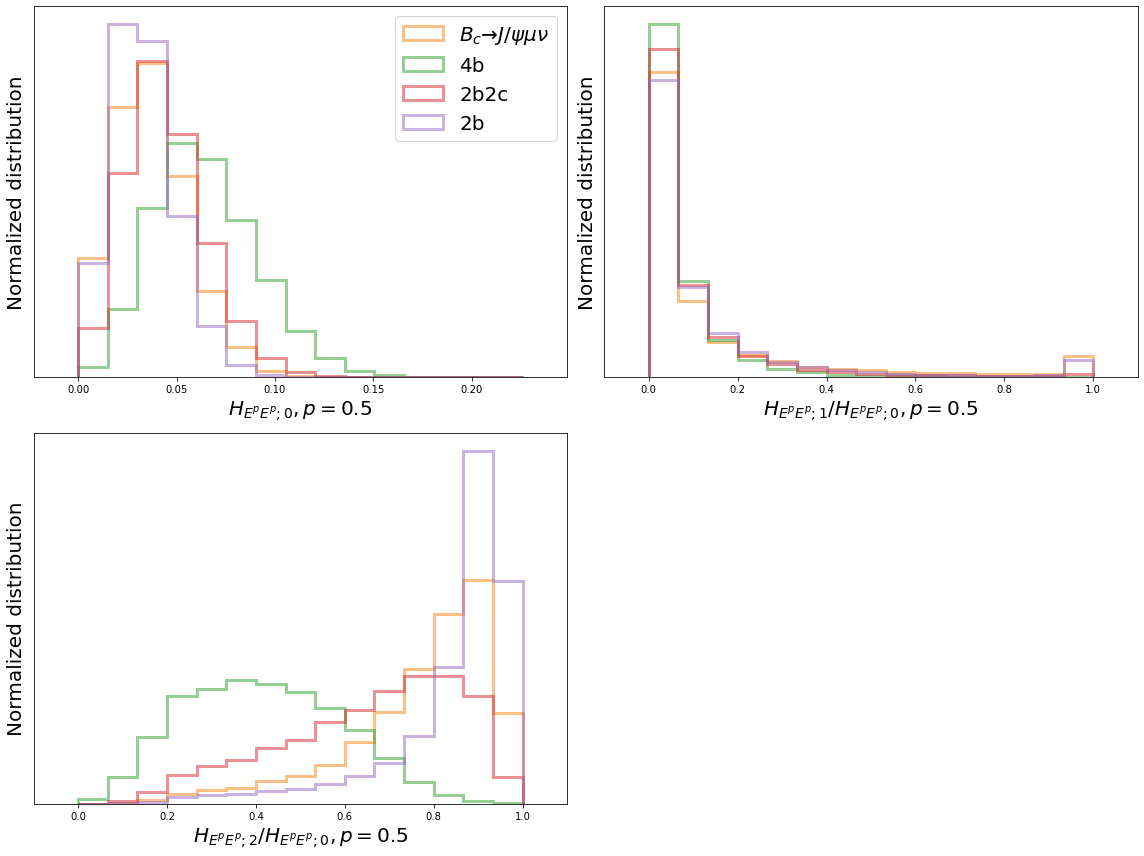

In [24]:

# f = plt.figure(figsize=(8,6))
f = plt.figure(figsize=(16,12))

bins_=15
range_=[0,df_tau_FlavorOnly['H_EE0'].max()*2]

ax1 = plt.subplot(221)
ax1.margins(x=0.1)
# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax1.hist(df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_4b_ = df_4b_FlavorOnly[(df_4b_FlavorOnly.H_EE2<=1)&(df_4b_FlavorOnly.H_EE2>=0)]
df_4b_ = df_4b_FlavorOnly
ax1.hist(df_4b_['H_EE0'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

# df_2b2c_ = df_2b2c_FlavorOnly[(df_2b2c_FlavorOnly.H_EE2<=1)&(df_2b2c_FlavorOnly.H_EE2>=0)]
df_2b2c_ = df_2b2c_FlavorOnly
ax1.hist(df_2b2c_['H_EE0'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

# df_2b_ = df_2b_FlavorOnly[(df_2b_FlavorOnly.H_EE2<=1)&(df_2b_FlavorOnly.H_EE2>=0)]
df_2b_ = df_2b_FlavorOnly
ax1.hist(df_2b_['H_EE0'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');

ax2 = plt.subplot(222)
ax2.margins(x=0.1)
range_=[0,1]

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax2.hist(df_mu_['H_EE1']/df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_4b_ = df_4b_FlavorOnly[(df_4b_FlavorOnly.H_EE2<=1)&(df_4b_FlavorOnly.H_EE2>=0)]
df_4b_ = df_4b_FlavorOnly
ax2.hist(df_4b_['H_EE1']/df_4b_['H_EE0'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

# df_2b2c_ = df_2b2c_FlavorOnly[(df_2b2c_FlavorOnly.H_EE2<=1)&(df_2b2c_FlavorOnly.H_EE2>=0)]
df_2b2c_ = df_2b2c_FlavorOnly
ax2.hist(df_2b2c_['H_EE1']/df_2b2c_['H_EE0'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

# df_2b_ = df_2b_FlavorOnly[(df_2b_FlavorOnly.H_EE2<=1)&(df_2b_FlavorOnly.H_EE2>=0)]
df_2b_ = df_2b_FlavorOnly
ax2.hist(df_2b_['H_EE1']/df_2b_['H_EE0'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');

ax3 = plt.subplot(223)
ax3.margins(x=0.1)

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax3.hist(df_mu_['H_EE2']/df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_4b_ = df_4b_FlavorOnly[(df_4b_FlavorOnly.H_EE2<=1)&(df_4b_FlavorOnly.H_EE2>=0)]
df_4b_ = df_4b_FlavorOnly
ax3.hist(df_4b_['H_EE2']/df_4b_['H_EE0'], weights=[1/len(df_4b_)]*len(df_4b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='4b', color='C2');

# df_2b2c_ = df_2b2c_FlavorOnly[(df_2b2c_FlavorOnly.H_EE2<=1)&(df_2b2c_FlavorOnly.H_EE2>=0)]
df_2b2c_ = df_2b2c_FlavorOnly
ax3.hist(df_2b2c_['H_EE2']/df_2b2c_['H_EE0'], weights=[1/len(df_2b2c_)]*len(df_2b2c_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b2c', color='C3');

# df_2b_ = df_2b_FlavorOnly[(df_2b_FlavorOnly.H_EE2<=1)&(df_2b_FlavorOnly.H_EE2>=0)]
df_2b_ = df_2b_FlavorOnly
ax3.hist(df_2b_['H_EE2']/df_2b_['H_EE0'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');


ax1.set_ylabel('Normalized distribution', fontsize=20)
ax1.set_xlabel(r"$H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax1.set_yticks([])
ax2.set_ylabel('Normalized distribution', fontsize=20)
ax2.set_xlabel(r"$H_{E^pE^p;1}/H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax2.set_yticks([])
ax3.set_ylabel('Normalized distribution', fontsize=20)
ax3.set_xlabel(r"$H_{E^pE^p;2}/H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax3.set_yticks([])
ax1.legend(loc=1, fontsize=20)


# f.savefig('./figures/FWM_EE2')
plt.tight_layout()

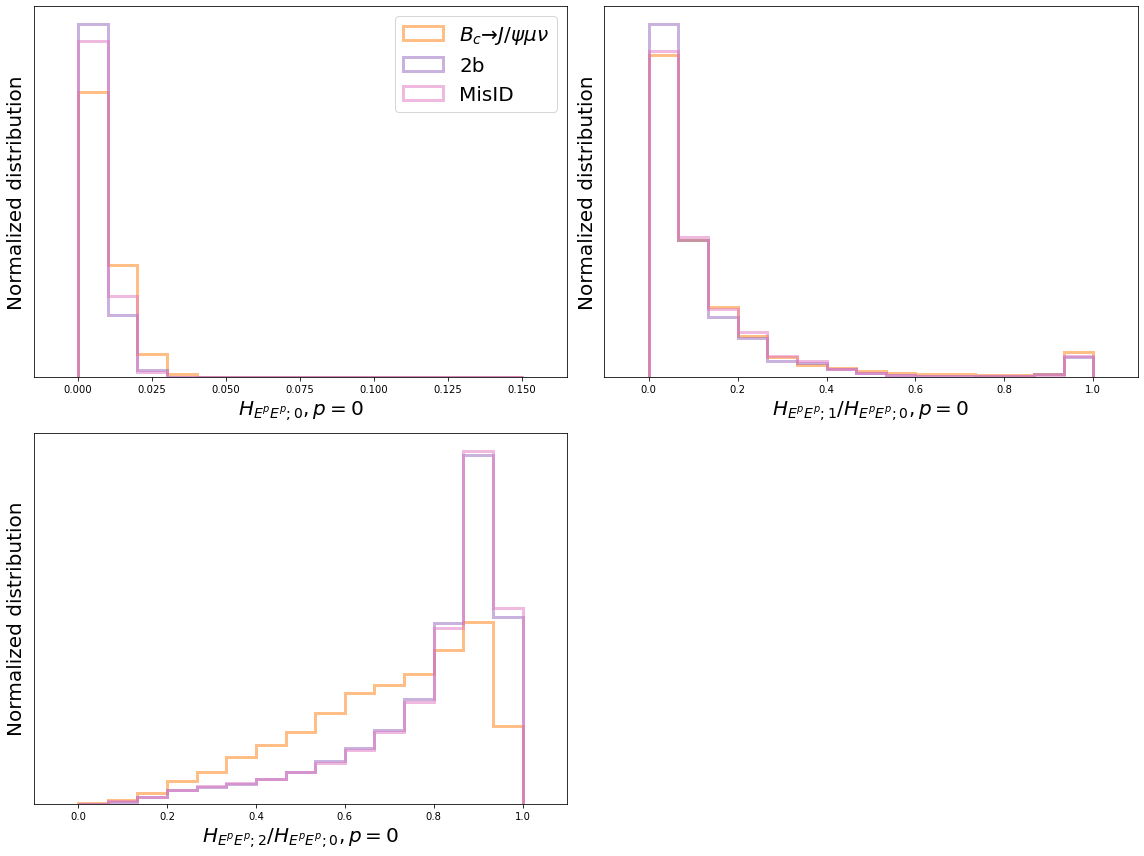

In [8]:

# f = plt.figure(figsize=(8,6))
f = plt.figure(figsize=(16,12))

bins_=15
range_=[0,df_tau_FlavorOnly['H_EE0'].max()*2]

ax1 = plt.subplot(221)
ax1.margins(x=0.1)
# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax1.hist(df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_2b_ = df_2b_FlavorOnly[(df_2b_FlavorOnly.H_EE2<=1)&(df_2b_FlavorOnly.H_EE2>=0)]
df_2b_ = df_2b_FlavorOnly
ax1.hist(df_2b_['H_EE0'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');

# df_misid_ = df_misid_FlavorOnly[(df_misid_FlavorOnly.H_EE2<=1)&(df_misid_FlavorOnly.H_EE2>=0)]
df_misid_ = df_misid_FlavorOnly
ax1.hist(df_misid_['H_EE2'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');

ax2 = plt.subplot(222)
ax2.margins(x=0.1)
range_=[0,1]

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax2.hist(df_mu_['H_EE1']/df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_2b_ = df_2b_FlavorOnly[(df_2b_FlavorOnly.H_EE2<=1)&(df_2b_FlavorOnly.H_EE2>=0)]
df_2b_ = df_2b_FlavorOnly
ax2.hist(df_2b_['H_EE1']/df_2b_['H_EE0'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');

# df_misid_ = df_misid_FlavorOnly[(df_misid_FlavorOnly.H_EE2<=1)&(df_misid_FlavorOnly.H_EE2>=0)]
df_misid_ = df_misid_FlavorOnly
ax2.hist(df_misid_['H_EE1']/df_misid_['H_EE0'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');

ax3 = plt.subplot(223)
ax3.margins(x=0.1)

# df_mu_ = df_mu_FlavorOnly[(df_mu_FlavorOnly.H_EE2<=1)&(df_mu_FlavorOnly.H_EE2>=0)]
df_mu_ = df_mu_FlavorOnly
ax3.hist(df_mu_['H_EE2']/df_mu_['H_EE0'], weights=[1/len(df_mu_)]*len(df_mu_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label=r'$B_c\to J/\psi \mu \nu$', color='C1');

# df_2b_ = df_2b_FlavorOnly[(df_2b_FlavorOnly.H_EE2<=1)&(df_2b_FlavorOnly.H_EE2>=0)]
df_2b_ = df_2b_FlavorOnly
ax3.hist(df_2b_['H_EE2']/df_2b_['H_EE0'], weights=[1/len(df_2b_)]*len(df_2b_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='2b', color='C4');

# df_misid_ = df_misid_FlavorOnly[(df_misid_FlavorOnly.H_EE2<=1)&(df_misid_FlavorOnly.H_EE2>=0)]
df_misid_ = df_misid_FlavorOnly
ax3.hist(df_misid_['H_EE2']/df_misid_['H_EE0'], weights=[1/len(df_misid_)]*len(df_misid_), range=range_, bins=bins_, histtype='step', lw=3, alpha=0.5, label='MisID', color='C6');






ax1.set_ylabel('Normalized distribution', fontsize=20)
ax1.set_xlabel(r"$H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax1.set_yticks([])
ax2.set_ylabel('Normalized distribution', fontsize=20)
ax2.set_xlabel(r"$H_{E^pE^p;1}/H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax2.set_yticks([])
ax3.set_ylabel('Normalized distribution', fontsize=20)
ax3.set_xlabel(r"$H_{E^pE^p;2}/H_{E^pE^p;0}$" + f"$, p={pwr}$", fontsize=20)
ax3.set_yticks([])
ax1.legend(loc=1, fontsize=20)


# f.savefig('./figures/FWM_EE2')
plt.tight_layout()